In [2]:
import geoplot as gplt
import geopandas as gpd
import geoplot.crs as gcrs
import imageio
import pandas as pd
import pathlib
import matplotlib.pyplot as plt
import mapclassify as mc
import numpy as np
import contextily as ctx
import seaborn as sns
from matplotlib.colors import ListedColormap



# map with 4 panels with output of classification 

In [3]:
# ----- сolors 

ff_color = plt.cm.Set1(1/8)
df_color = plt.cm.Set1(0/8)

colors = [ff_color, df_color]


# ------ data

# bounds of regions in HMA
path_map = '/Users/varyabazilova/Desktop/alluvial_fans/'
hma_bound = gpd.read_file(path_map + 'regions_HMA.shp')
gdf = hma_bound
# watersheds polygons 
path = '/Users/varyabazilova/Desktop/alluvial_fans/dem_all/new_points_catchmetns/all_points/9_final_watersheds/reprojected/'
wsheds = gpd.read_file(path + 'wsheds_reproject.shp')[['id', 'geometry']]
# output of the model with predicted class and predicted confusions 
output = pd.read_csv('out/20240605_new_model_predictions_output.csv', index_col = 0)
output['id'] = output.index

# ------ data clean 
output = output.copy()[['id','y_result', 'y_result_probs','diff_res', 'target']]
wsheds = wsheds.merge(output)


In [4]:
# output.columns

/Users/varyabazilova/opt/anaconda3/envs/geoenv/lib/python3.8/site-packages/geopandas/plotting.py:658: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(
/Users/varyabazilova/opt/anaconda3/envs/geoenv/lib/python3.8/site-packages/geopandas/plotting.py:658: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(
/Users/varyabazilova/opt/anaconda3/envs/geoenv/lib/python3.8/site-packages/geopandas/plotting.py:658: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(
/Users/varyabazilova/opt/anaconda3/envs/geoenv/lib/python3.8/site-packages/geopandas/plotting.py:658: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(
/Users/varyabazilova/opt/anaconda3/envs/geoenv/lib/python3.8/site-packages/geopandas/plotting.py:658: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(
/Users/varyabazilova/opt/anaconda3/envs/geoenv/lib/python3.8

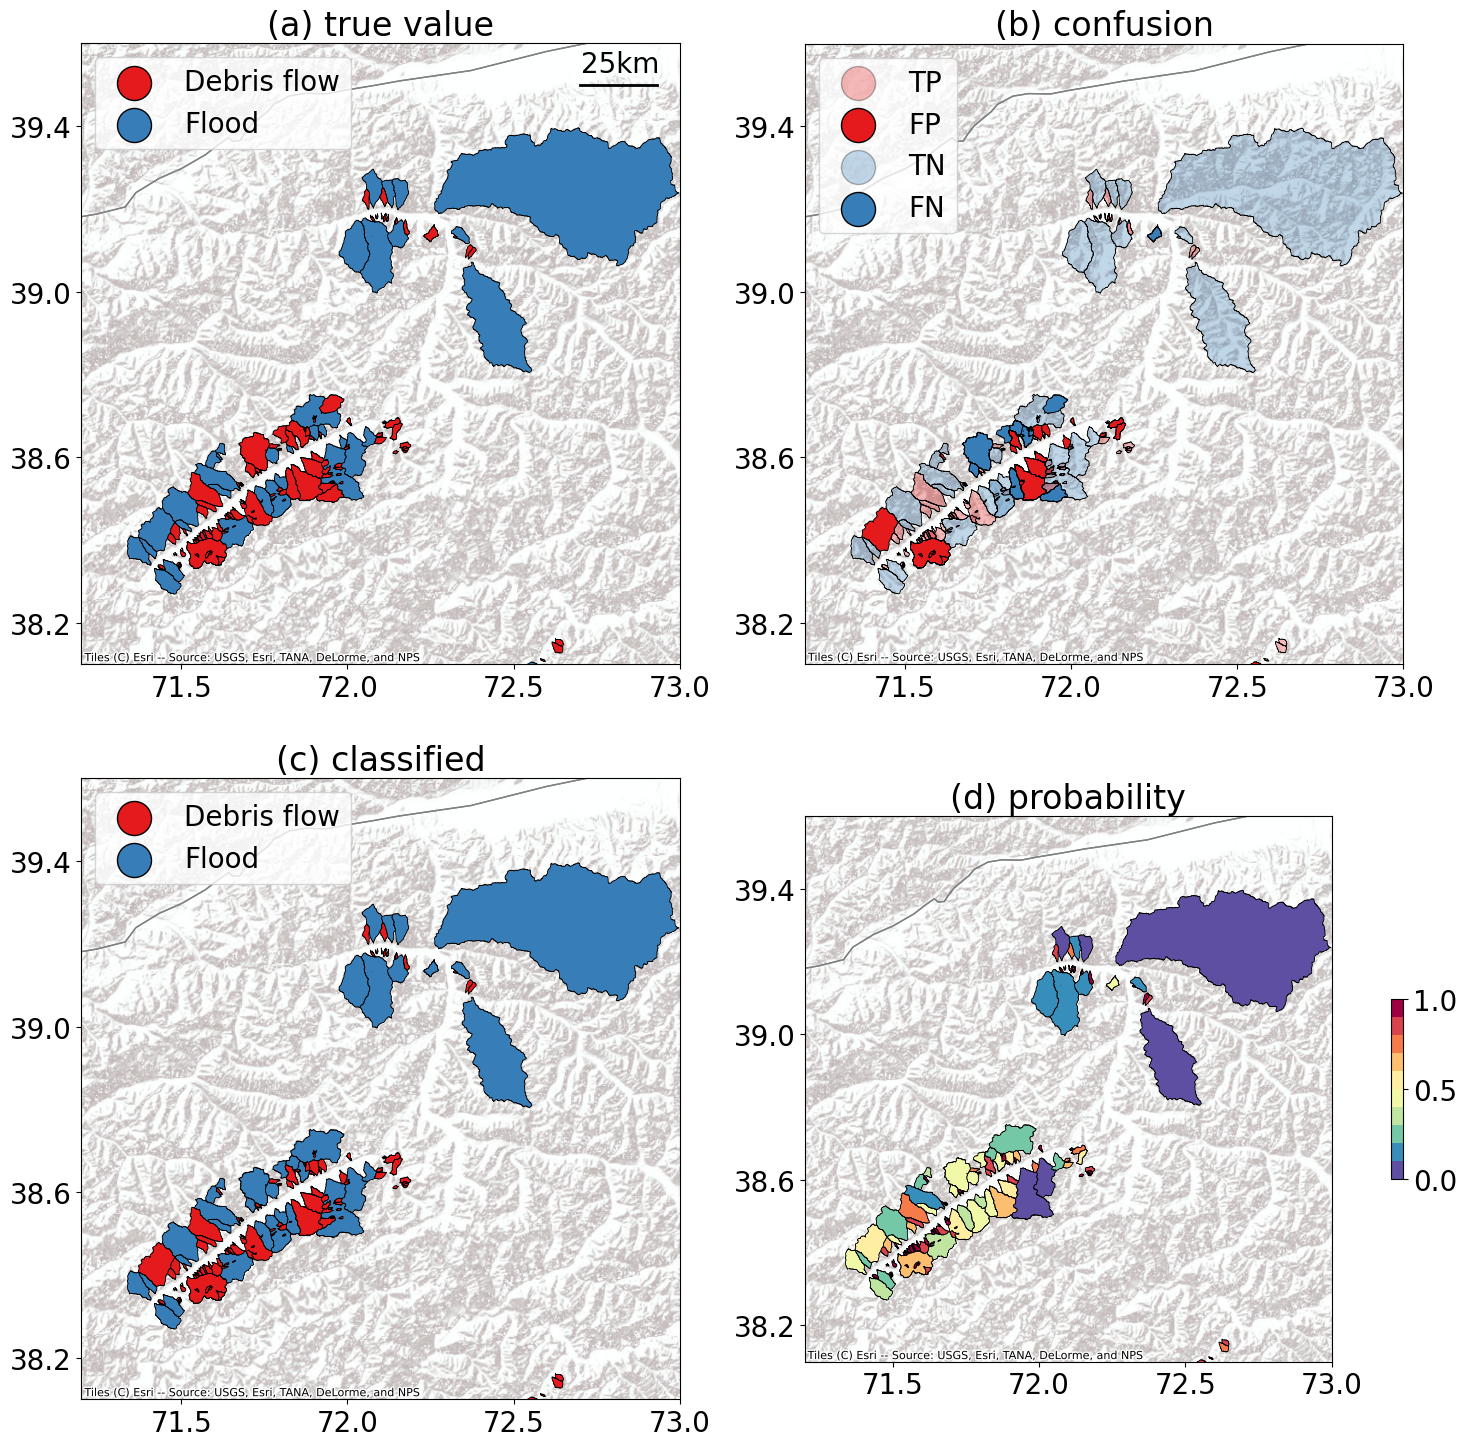

In [5]:
# Plot with Mosaic

plt.rcParams.update({'font.size': 20})



fig = plt.figure(figsize=(15, 15), layout = 'tight')
mosaic = fig.subplot_mosaic('''
                            AB
                            CD
                            ''')
# A true   |B conf
# C predict|D prob

mosaic['A'].set_xlim(71.2,73)
mosaic['A'].set_ylim(38.1,39.6)

mosaic['B'].set_xlim(71.2,73)
mosaic['B'].set_ylim(38.1,39.6)

mosaic['C'].set_xlim(71.2,73)
mosaic['C'].set_ylim(38.1,39.6)

mosaic['D'].set_xlim(71.2,73)
mosaic['D'].set_ylim(38.1,39.6)

ctx.add_basemap(mosaic['A'], crs=gdf.crs.to_string(), source=ctx.providers.Esri.WorldTerrain)
ctx.add_basemap(mosaic['B'], crs=gdf.crs.to_string(), source=ctx.providers.Esri.WorldTerrain)
ctx.add_basemap(mosaic['C'], crs=gdf.crs.to_string(), source=ctx.providers.Esri.WorldTerrain)
ctx.add_basemap(mosaic['D'], crs=gdf.crs.to_string(), source=ctx.providers.Esri.WorldTerrain)

# Step 5: Overlay your shapefiles on top
gdf.plot(ax=mosaic['A'], color='none', edgecolor='grey')
gdf.plot(ax=mosaic['B'], color='none', edgecolor='grey')
gdf.plot(ax=mosaic['C'], color='none', edgecolor='grey')
gdf.plot(ax=mosaic['D'], color='none', edgecolor='grey')


# ----------------target
wsheds[wsheds.target==0].plot(ax = mosaic['A'], column='target', edgecolor = 'black',linewidth=0.5, color = ff_color)
wsheds[wsheds.target==1].plot(ax = mosaic['A'], column='target', edgecolor = 'black',linewidth=0.5, color = df_color)

# legends: 
mosaic['A'].scatter([65],[49], marker='o', edgecolor='black',facecolor = df_color,  s=60*10, label = 'Debris flow')
mosaic['A'].scatter([65],[49], marker='o', edgecolor='black',facecolor = ff_color, s=60*10, label = 'Flood')
mosaic['A'].legend(loc = 'upper left')


# -------------- y_result
wsheds[wsheds.y_result==0].plot(ax = mosaic['C'], column='y_result', edgecolor = 'black',linewidth=0.5, color = ff_color)
wsheds[wsheds.y_result==1].plot(ax = mosaic['C'], column='y_result', edgecolor = 'black',linewidth=0.5, color = df_color)

# legends: 
mosaic['C'].scatter([65],[49], marker='o', edgecolor='black',facecolor = df_color,  s=60*10, label = 'Debris flow')
mosaic['C'].scatter([65],[49], marker='o', edgecolor='black',facecolor = ff_color, s=60*10, label = 'Flood')
mosaic['C'].legend(loc = 'upper left')


# ------------- confusion
# TP (correct DF)
wsheds[wsheds.diff_res==2].plot(ax = mosaic['B'], column='diff_res', edgecolor = 'none',linewidth=0.5, color = df_color, alpha = 0.3)
# FP (wrond DF)
wsheds[wsheds.diff_res== -1].plot(ax = mosaic['B'], column='diff_res', edgecolor = 'none',linewidth=0.5, color = df_color)
# TN (correct FF)
wsheds[wsheds.diff_res==0].plot(ax = mosaic['B'], column='diff_res', edgecolor = 'none',linewidth=0.5, color = ff_color, alpha = 0.3)
# FN (wrond FF)
wsheds[wsheds.diff_res== 1].plot(ax = mosaic['B'], column='diff_res', edgecolor = 'none',linewidth=0.5, color = ff_color)

# countours
wsheds.plot(ax = mosaic['B'], column='diff_res', edgecolor = 'black',linewidth=0.5, color = 'none')

# legend:
mosaic['B'].scatter([65],[49], marker='o', edgecolor='black',facecolor = df_color,  alpha = 0.3, s=60*10, label = 'TP')
mosaic['B'].scatter([65],[49], marker='o', edgecolor='black',facecolor = df_color,  s=60*10, label = 'FP')
mosaic['B'].scatter([65],[49], marker='o', edgecolor='black',facecolor = ff_color,  alpha = 0.3, s=60*10, label = 'TN')
mosaic['B'].scatter([65],[49], marker='o', edgecolor='black',facecolor = ff_color,  s=60*10, label = 'FN')
mosaic['B'].legend(loc = 'upper left')




# -----------y_probability
cmap = plt.cm.get_cmap('Spectral_r', 10)  
wsheds.plot(ax = mosaic['D'], column='y_result_probs', cmap = cmap, linewidth=0.5,edgecolor = 'black', legend = False)
# fig.colorbar(plt.cm.ScalarMappable(cmap = cmap), ax=mosaic['D'])


sm = plt.cm.ScalarMappable(cmap=cmap)

# Create the colorbar at a manually specified position
cbar = plt.colorbar(sm, ax=mosaic['D'], fraction=0.02, pad=0.1, aspect=15)
# Set the position of the colorbar manually
cbar.ax.set_position([0.5, 0.1, 0.03, 0.8])  # [left, bottom, width, height]




# colorbar = plt.colorbar(cmap, ax=mosaic['D'], orientation='vertical', label='Colorbar Label')
# colorbar.ax.set_position([0.8, 0.1, 0.03, 0.8])  # [left, bottom, width, height]

# Set the position of the colorbar


mosaic['A'].set_title('(a) true value')
mosaic['B'].set_title('(b) confusion')
mosaic['C'].set_title('(c) classified')
mosaic['D'].set_title('(d) probability')


mosaic['A'].set_yticks([38.2, 38.6, 39, 39.4], labels=['38.2', '38.6', '39.0', '39.4'])
mosaic['B'].set_yticks([38.2, 38.6, 39, 39.4], labels=['38.2', '38.6', '39.0', '39.4'])
mosaic['C'].set_yticks([38.2, 38.6, 39, 39.4], labels=['38.2', '38.6', '39.0', '39.4'])
mosaic['D'].set_yticks([38.2, 38.6, 39, 39.4], labels=['38.2', '38.6', '39.0', '39.4'])
# mosaic['D'].set_xticks([38.2, 38.6, 39, 39.4], labels=[' ', ' ', ' ', ' '])


# scale bar for 25km
x = (72.7, 39.5)
y = (72.7+0.23, 39.5)
mosaic['A'].plot([x[0], y[0]], [x[1], y[1]], color='black', linewidth=2)
mosaic['A'].text(72.82, 39.55, '25km', fontsize=20, ha='center', va='center')


plt.savefig('out/probability_maps_NOcolorbar.png', dpi = 300 , bbox_inches = 'tight')
# plt.savefig('out/probability_maps_COLORBAR.png', dpi = 300 , bbox_inches = 'tight')



## map with the data, pie charts, region bounds and data distribution with elevation

In [6]:
# dta for the map 

# HMA polygons 
def categorize_region(row):
    ''' Function to create region categories ''' 
    south = ['Central Himalaya', 'Eastern Himalaya', 'Western Himalaya']
    interior = ['Tibetan Interior Mountains', 'Altun Shan', 'Eastern Kunlun Shan', 'Western Kunlun Shan', 'Gangdise Mountains']
    west = ['Pamir Alay', 'Eastern Hindu Kush', 'Western Pamir', 'Eastern Pamir', 'Karakoram']
    east = ['Tanggula Shan', 'Nyainqentanglha', 'Hengduan Shan', 'Qilian Shan', 'Eastern Tibetan Mountains']
    
    if row['Name'] in south:
        return 'South'
    elif row['Name'] in interior:
        return 'Interior'
    elif row['Name'] in west:
        return 'West'
    elif row['Name'] in east:
        return 'East'
    else:
        return 'North'
    
hma_bound['big_region'] = hma_bound.apply(categorize_region, axis=1)

# merge regions into the bigger regions 
hma_bigregions = hma_bound.dissolve('big_region')

# calculate centroids for each big region
data = hma_bigregions
# Calculate centroids
data['centroid'] = data['geometry'].centroid


data['X'] = [97.61814, 86.26351, 80.52568, 81, 72.79205]   # change south (ind = 3) to 81, 30
data['Y'] = [32.70886, 34.33006, 42.75172, 30, 37.38188]



# catchment locations 

def categorize_region(row):
    ''' Function to create region categories ''' 
    south = ['Central Himalaya', 'Eastern Himalaya', 'Western Himalaya']
    interior = ['Tibetan Interior Mountains', 'Altun Shan', 'Eastern Kunlun Shan', 'Western Kunlun Shan', 'Gangdise Mountains']
    west = ['Pamir Alay', 'Eastern Hindu Kush', 'Western Pamir', 'Eastern Pamir', 'Karakoram']
    east = ['Tanggula Shan', 'Nyainqentanglha', 'Hengduan Shan', 'Qilian Shan', 'Eastern Tibetan Mountains']
    
    if row['region'] in south:
        return 'South'
    elif row['region'] in interior:
        return 'Interior'
    elif row['region'] in west:
        return 'West'
    elif row['region'] in east:
        return 'East'
    else:
        return 'North'

df = pd.read_csv('/Users/varyabazilova/Desktop/alluvial_fans/final/!!_050723_cathments_data.csv', index_col = 0)
df['big_region'] = df.apply(categorize_region, axis = 1)


# convert to geopandas df
catch_points = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.x_wgs, df.y_wgs), crs="EPSG:4326"
)


# other things 
# rivers 
rivers_path = '/Users/varyabazilova/Desktop/uu/VICI2023_MAP/data/'
basins = gpd.read_file(rivers_path + 'basins_HMA_major_cleaned.shp')
rivers = gpd.read_file(rivers_path + 'esri_major_rivers.shp')



/var/folders/31/xdyntby945q7564txk4rqyh40000gp/T/ipykernel_95736/3700803192.py:30: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  data['centroid'] = data['geometry'].centroid


In [7]:
# data.centroid

In [8]:
# fig, ax = plt.subplots(figsize = (10, 8))

# data.plot(ax = ax, cmap = 'Blues')
# # data.centroid.plot(ax = ax, cmap = 'coolwarm')

# ax.plot(81, 30, color = 'magenta', marker = 'X') # south - better coordinates 

In [9]:
# calculate how many points are where and what is the fraction of each 

# filter
t0 = df[df.target == 0].groupby(['big_region']).count()['target']
t1 = df[df.target == 1].groupby(['big_region']).count()['target']

catch_count = pd.DataFrame({'FF':t0, 'DF':t1})

# sort:
catch_count['total']=catch_count.FF + catch_count.DF
catch_count = catch_count.sort_values('total', ascending=True)

# # plot
# pd.DataFrame({'FF':catch_count.FF, 'DF':catch_count.DF}).plot.barh(figsize = (8, 8), color=[ff_color, df_color], alpha = 0.6,
#                                                 xlabel = 'count', rot=0, width=0.8, stacked=True)



In [10]:


catch_count = catch_count.reset_index()
# df = df.rename(columns={"region": "Name"})
together = catch_count.merge(data, on = 'big_region')

together = together[['FF', 'DF', 'total', 'big_region','centroid', 'X', 'Y']]


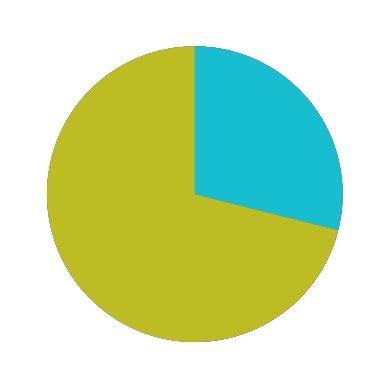

In [11]:
# make pies from this talbe 

wedges0=plt.pie([together.DF[0], together.FF[0]],  startangle=90)
wedges1=plt.pie([together.DF[1], together.FF[1]],  startangle=90)
wedges2=plt.pie([together.DF[2], together.FF[2]],  startangle=90)
wedges3=plt.pie([together.DF[3], together.FF[3]],  startangle=90)
wedges4=plt.pie([together.DF[4], together.FF[4]],  startangle=90)

together = gpd.GeoDataFrame(together, geometry=gpd.points_from_xy(together.X, together.Y))


In [12]:
together = gpd.GeoDataFrame(together, geometry=gpd.points_from_xy(together.X, together.Y))

together

FF   DF  total big_region                   centroid         X         Y  \
0   79   85    164      North  POINT (80.52568 42.75172)  80.52568  42.75172   
1   83  113    196      South  POINT (83.28523 30.15554)  81.00000  30.00000   
2  141  133    274       East  POINT (97.61814 32.70886)  97.61814  32.70886   
3  228  228    456   Interior  POINT (86.26351 34.33006)  86.26351  34.33006   
4  207  509    716       West  POINT (72.79205 37.38188)  72.79205  37.38188   

                    geometry  
0  POINT (80.52568 42.75172)  
1  POINT (81.00000 30.00000)  
2  POINT (97.61814 32.70886)  
3  POINT (86.26351 34.33006)  
4  POINT (72.79205 37.38188)

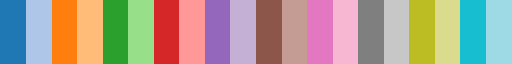

In [13]:
plt.cm.tab20


In [14]:
# determine colors for big regions

region_colors = [plt.cm.hsv(4/20), plt.cm.hsv(8/20), plt.cm.hsv(12/20), plt.cm.hsv(16/20), plt.cm.hsv(20/20)]

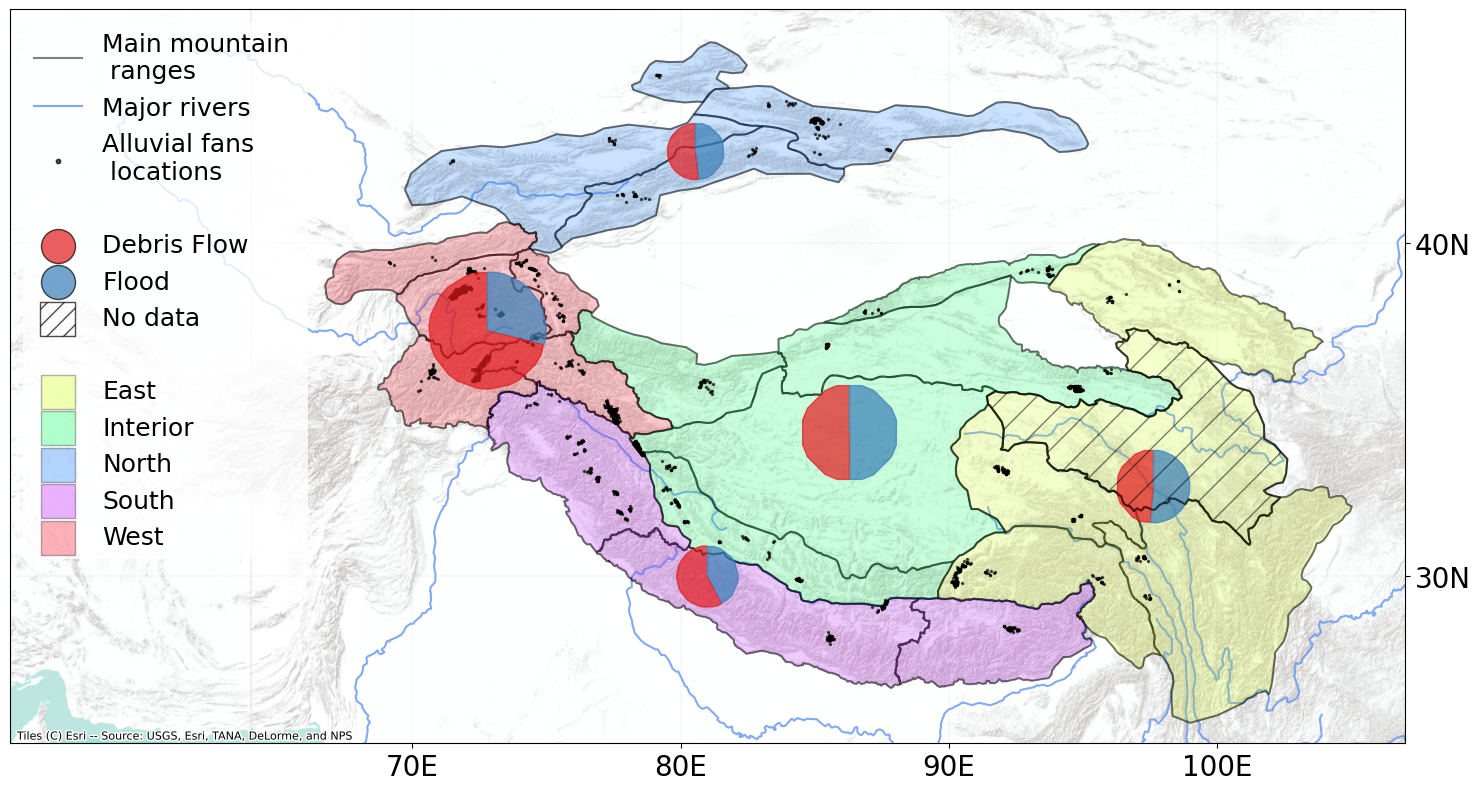

In [15]:

fig, ax = plt.subplots(figsize = (18,18))


# Bolch et al regions
hma_bound2 = hma_bound.set_crs('ESRI:102025', allow_override=True)
hma_bound2.boundary.plot(ax=ax,zorder=1, edgecolor="black",
    facecolor="none",
    alpha = 0.5, label = 'Main mountain \n ranges') 

hma_bound2[hma_bound2.Name == 'Eastern Tibetan Mountains'].boundary.plot(ax=ax, hatch = '/', edgecolor="black",
    facecolor= "none",
    alpha = 0.5) 


# bid regions from varya 
hma_bigregions = hma_bigregions.set_crs('ESRI:102025', allow_override=True)
# hma_bigregions.boundary.plot(ax=ax,zorder=2, edgecolor="black",
#                              facecolor="none", alpha = 0.5) 

hma_bigregions.plot(ax=ax,zorder=1, color = region_colors, edgecolor = 'black', alpha = 0.2)


extent = hma_bound2.total_bounds


# Set the extent
extent = (55, 107, 25, 47)  # Replace with your desired extent values
ax.set_xlim(extent[0], extent[1])
ax.set_ylim(extent[2], extent[3])
ax.yaxis.tick_right()

ctx.add_basemap(ax, crs='EPSG:4326', source=ctx.providers.Esri.WorldTerrain)#, zoom=12)

rivers.plot(ax=ax, color ='cornflowerblue', alpha = 0.8, label = 'Major rivers', zorder = 0)
# basins.plot(ax=ax, facecolor = 'none', edgecolor ='green', alpha = 0.8, label = 'major rivers', zorder = 0)

catch_points.plot(ax = ax, facecolor="black", edgecolor="black", alpha =0.6, markersize=2)

piecolor=[df_color, ff_color]

# ax.plot([],[],label='v', marker='s', linewidth=0, color='violet')
# ax.legend()
alpha = 0.7

# for j in range(2):
#     ax.scatter([together.X[0],],[together.Y[0]], marker=(wedges0[0][j].get_path().vertices.tolist()),
#                facecolor=piecolor[j], alpha = alpha, s=together.total[0]*10)

for j in range(2):
    ax.scatter([together.X[0]],[together.Y[0]], marker=(wedges0[0][j].get_path().vertices.tolist()),
               facecolor=piecolor[j], alpha = alpha, s=together.total[0]*10)

for j in range(2):
    ax.scatter([together.X[1]],[together.Y[1]], marker=(wedges1[0][j].get_path().vertices.tolist()),
               facecolor=piecolor[j], alpha = alpha, s=together.total[1]*10)

for j in range(2):
    ax.scatter([together.X[2]],[together.Y[2]], marker=(wedges2[0][j].get_path().vertices.tolist()),
               facecolor=piecolor[j], alpha = alpha, s=together.total[2]*10)

for j in range(2):
    ax.scatter([together.X[3]],[together.Y[3]], marker=(wedges3[0][j].get_path().vertices.tolist()),
               facecolor=piecolor[j],alpha = alpha, s=together.total[3]*10)
    
for j in range(2):
    ax.scatter([together.X[4]],[together.Y[4]], marker=(wedges4[0][j].get_path().vertices.tolist()),
               facecolor=piecolor[j], alpha = alpha, s=together.total[4]*10)
    
    
    
# hma_bound2.apply(lambda x: ax.annotate(text=x['Name'], xy=x.geometry.centroid.coords[0], ha='upper', fontsize = 10), axis=1);


plt.grid(linewidth = .1)
plt.xticks([70, 80, 90, 100], labels=['70E', '80E','90E', '100E'])
plt.yticks([30, 40], labels=['30N','40N'])


# legend: 4 new pies, located at the left bottom of the map
# ax.scatter([65.6],[45], marker='o', edgecolor='none',facecolor ='none', alpha = alpha,   s=60, label = ' ')

ax.scatter([65.6],[49], marker='o', edgecolor='black',facecolor = 'black', alpha = alpha,   s=10, label = 'Alluvial fans \n locations')

ax.scatter([65.6],[45], marker='o', edgecolor='none',facecolor ='none', alpha = alpha,   s=60, label = ' ')

# # size of the pies
# ax.scatter([65.6],[49], marker='o', edgecolor='black',facecolor ='none', alpha = alpha,   s=240*10, label = '240')
# ax.scatter([65.6],[49], marker='o', edgecolor='black',facecolor ='none', alpha = alpha,     s=180*10, label = '180')
# ax.scatter([65.6],[49], marker='o', edgecolor='black',facecolor ='none', alpha = alpha,   s=120*10, label = '120')
# ax.scatter([65.6],[49], marker='o', edgecolor='black',facecolor ='none', alpha = alpha,   s=60*10, label = '60')


ax.scatter([65.6],[49], marker='o', edgecolor='black',facecolor = df_color, alpha = alpha,   s=60*10, label = 'Debris Flow')
ax.scatter([65.6],[49], marker='o', edgecolor='black',facecolor = ff_color, alpha = alpha,   s=60*10, label = 'Flood')
ax.scatter([65.6],[49], marker='s', edgecolor='black',facecolor = 'none', hatch = '//', alpha = alpha,   s=60*10, label = 'No data')


# other things 
ax.scatter([65.6],[45], marker='o', edgecolor='none',facecolor ='none', alpha = alpha,   s=60, label = ' ')

# big regions 
ax.scatter([65.6],[49], marker='s', edgecolor='black',facecolor = region_colors[0], alpha = 0.3,   s=60*10, label = 'East')
ax.scatter([65.6],[49], marker='s', edgecolor='black',facecolor = region_colors[1], alpha = 0.3,   s=60*10, label = 'Interior')
ax.scatter([65.6],[49], marker='s', edgecolor='black',facecolor = region_colors[2], alpha = 0.3,   s=60*10, label = 'North')
ax.scatter([65.6],[49], marker='s', edgecolor='black',facecolor = region_colors[3], alpha = 0.3,   s=60*10, label = 'South')
ax.scatter([65.6],[49], marker='s', edgecolor='black',facecolor = region_colors[4], alpha = 0.3,   s=60*10, label = 'West')


plt.legend(loc ='upper left', frameon = True, facecolor='white', edgecolor = 'none', fontsize = 18)#, framealpha=1)

# plt.savefig('out/map_pie_charts_big_regions.png', dpi = 300,  bbox_inches='tight')

In [16]:
# remove the size of the pies in the legend 
# manually add the lines to the plot with the total count of the catchments 


# pyramid with catchmetn count per elevation

In [17]:
df = pd.DataFrame({'elevation':['>6000', '5500-6000', '5000-5500', '4500-5000', '4000-4500', '3500-4000','3000-3500', '2500-3000', '2000-2500', '<2000'],# ['<2000','2000-2500','2500-3000','3000-3500','3500-4000','4000-4500','4500-5000','5000-5500','5500-6000','>6000'],
                    '0 FF': [3, 74, 185, 167, 153, 90, 39, 9, 8, 13], #[13,8,9, 39, 90, 153, 167, 185, 74, 3],
                    '1 DF': [ 2, 100, 209, 287, 193, 169, 70, 29, 7, 1 ]})#[1, 7, 29, 70, 169, 193, 287, 209, 100, 2]})

df['0 FF'] = df['0 FF'] * -1
df['1 DF'] = df['1 DF'] * 1



[Text(-200, 0, '200'),
 Text(-150, 0, ''),
 Text(-100, 0, '100'),
 Text(-50, 0, ''),
 Text(0, 0, '0'),
 Text(50, 0, ''),
 Text(100, 0, '100'),
 Text(150, 0, ''),
 Text(200, 0, '200')]

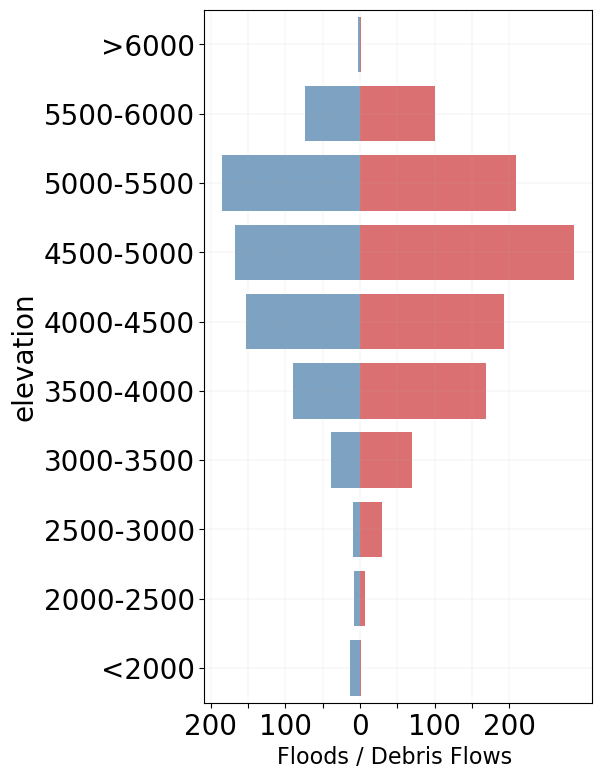

In [18]:


fig, ax1 = plt.subplots(figsize = (5,9))


sns.barplot(x='0 FF', y='elevation', data=df, color =ff_color, alpha = 0.7)
ax2 = sns.barplot(x='1 DF', y='elevation', data=df,color=df_color, alpha = 0.7)
plt.xlabel("Floods / Debris Flows ", fontsize = 16)
plt.grid(linewidth = .1)

ax1.set_xticks(ticks=[-200, -150, -100, -50, 0,50, 100, 150, 200])
ax1.set_xticklabels(['200', '', '100','', '0','', '100', '', '200'])

# plt.yticks(fontsize = 16)
# plt.ylabel('elevation [m a.s.l.]', fontsize = 18)


# plt.savefig('out/elevation_pyramid.png',dpi=300, bbox_inches='tight')